In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
cpi = pd.DataFrame(pd.read_excel("tüfe.xls"))
cpi.head()

,Tüketici fiyat endeks rakamları (2003=100),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Consumer price index numbers (2003=100),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
2,NaN,January,February,March,April,May,June,July,August,September,October,November,December
3,2003,94.77,96.23,98.12,99.09,100.04,100.12,99.93,100.09,101.44,102.38,103.68,104.12
4,2004,104.81,105.35,106.36,106.89,107.35,107.21,107.72,108.54,109.57,112.03,113.5,113.86


In [3]:
cpi.columns = cpi.iloc[2]
cpi_new = cpi.drop([0,1,2])


In [4]:
month_list = cpi_new.columns
month_list = month_list[1:]
cpi_new.columns.values[0] = 'years'
cpi_new = pd.melt(cpi_new,  id_vars='years',value_vars=month_list, var_name='months', ignore_index=False)
cpi_new.set_index(['years','months'])

,,value
years,months,
2003,January,94.77
2004,January,104.81
2005,January,114.49
2006,January,123.57
2007,January,135.84
...,...,...
2019,December,440.5
2020,December,504.81
2021,December,686.95


In [5]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
cpi_new['months'] = pd.Categorical(cpi_new['months'], categories=list(month_mapping.keys()), ordered=True)

cpi_new = cpi_new.sort_values(['years', 'months'])
cpi_new = cpi_new.reset_index(drop=True)
cpi_new.head()

,years,months,value
0,2003,January,94.77
1,2003,February,96.23
2,2003,March,98.12
3,2003,April,99.09
4,2003,May,100.04


In [6]:
cpi_new['months'] = cpi_new['months'].str.replace('January', 'Q1')
cpi_new['months'] = cpi_new['months'].str.replace('April', 'Q2')
cpi_new['months']  =cpi_new['months'].str.replace('July', 'Q3')
cpi_new['months']  = cpi_new['months'].str.replace('October', 'Q4')
cpi_new  = cpi_new[(cpi_new.months.str.contains('Q') == True)]
cpi_new.rename(columns = {'months':'Quarter'}, inplace = True)
cpi_new = cpi_new.loc[cpi_new['years'] > 2008]
cpi_new = cpi_new.reset_index(drop=True)
cpi_new.head()

,years,Quarter,value
0,2009,Q1,160.9
1,2009,Q2,162.15
2,2009,Q3,163.78
3,2009,Q4,167.88
4,2010,Q1,174.07


In [7]:
wage = pd.DataFrame(pd.read_excel("saatlikücret.xls"))
wage.rename(columns = {'Çeyrek\nQuarter':'Quarter', 'Yıl\nYear':'years'}, inplace = True)
wage['years'] = wage['years'].fillna(method='ffill')
replace_dict = {'I': 'Q1', 'II': 'Q2', 'III': 'Q3', 'IV':'Q4'}
wage['Quarter'] = wage['Quarter'].replace(replace_dict)
wage.head()

,years,Quarter,Değer
0,2009,Q1,57.725804
1,2009,Q2,56.684587
2,2009,Q3,58.136940
3,2009,Q4,60.296345
4,2010,Q1,60.716468


In [17]:
def proccesWage(x):
    x = x * 2.78
    return x
wage['Değer'] = wage['Değer'].apply(proccesWage)

In [27]:
data = pd.merge(wage, cpi_new)
data.rename(columns = {'Değer':'wage','value': 'tufe'}, inplace=True)

Text(0, 0.5, 'tufe vs. Wages and salaries - 12-month change')

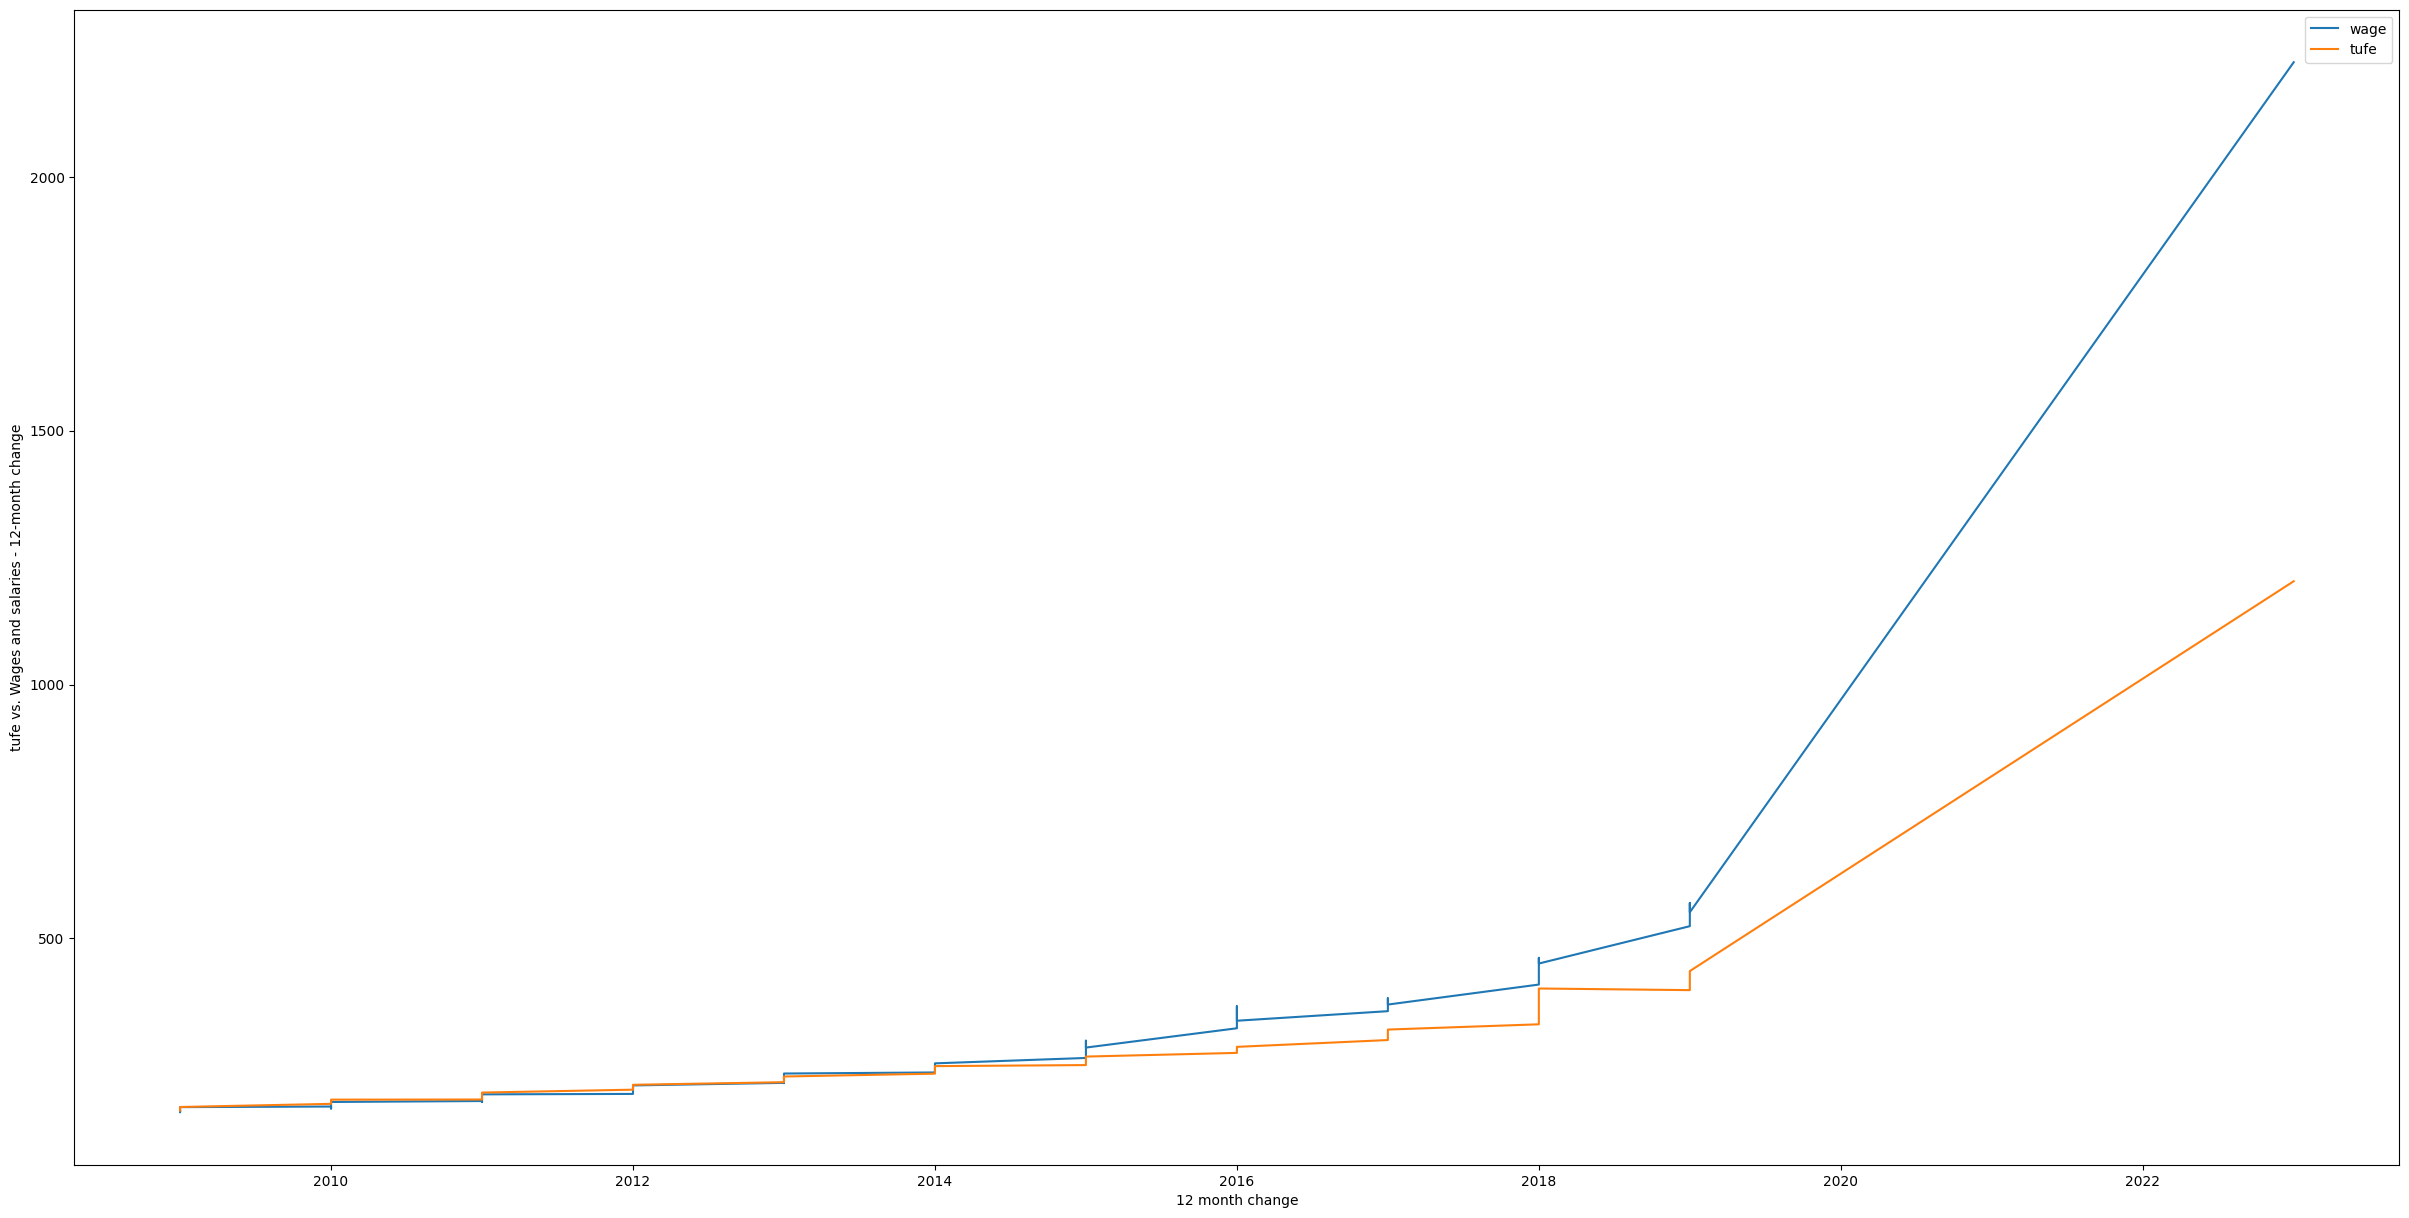

In [28]:
data.set_index('years', inplace=True)
ax = data.plot(kind='line', figsize=(30, 15))
ax.set_xlabel('12 month change')
ax.set_ylabel('tufe vs. Wages and salaries - 12-mont\
h change')